In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../output/MNLI/1500_mnli_cond_pairs_tagged_hypos.csv')

In [137]:
print(df.columns)
df.head()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'line-num', 'pred-model', 'fill-model',
       'premise', 'hypothesis', 'mask-filled', 'token_changes', 'fill_prob',
       'n_gram', 'Word2Vec-Score', 'Bert-Score', 'gold-label',
       'token-similarity', 'orig-label', 'new-label', 'orig-label-prob',
       'same-label-prob', 'new-label-prob', 'label-changed',
       'same-label-prob-diff', 'flip-class'],
      dtype='object')


,Unnamed: 0,Unnamed: 0.1,line-num,pred-model,fill-model,premise,hypothesis,mask-filled,token_changes,fill_prob,...,gold-label,token-similarity,orig-label,new-label,orig-label-prob,same-label-prob,new-label-prob,label-changed,same-label-prob-diff,flip-class
0,0,0,261090,mnli-roberta,BartLargeMNLI,"So in a sense, island life continues just as i...",Island life is nothing at all like it used to be.,"But in a way, island life is nothing at all li...","('Island', 'But in a way, island')",9.92%,...,2,0.621199,contradiction,contradiction,1.0,1.00,1.00,False,0.00,3
1,1,1,261090,mnli-roberta,BartLargeMNLI,"So in a sense, island life continues just as i...",Island life is nothing at all like it used to be.,"In other words, life on the island is nothing ...","('Island life', 'In other words, life on the i...",9.96%,...,2,0.776853,contradiction,contradiction,1.0,1.00,1.00,False,0.00,3
2,2,2,261090,mnli-roberta,BartLargeMNLI,"So in a sense, island life continues just as i...",Island life is nothing at all like it used to be.,Except that it's nothing at all like it used t...,"('Island life is', ""Except that it's"")",9.87%,...,2,0.676319,contradiction,contradiction,1.0,0.97,0.97,False,0.03,3
3,3,3,261090,mnli-roberta,BartLargeMNLI,"So in a sense, island life continues just as i...",Island life is nothing at all like it used to be.,Island life today is nothing at all like it us...,"('life', 'life today')",10.04%,...,2,0.863040,contradiction,contradiction,1.0,1.00,1.00,False,0.00,3
4,4,4,261090,mnli-roberta,BartLargeMNLI,"So in a sense, island life continues just as i...",Island life is nothing at all like it used to be.,But it is nothing at all like it used to be.,"('Island life', 'But it')",10.12%,...,2,0.524967,contradiction,contradiction,1.0,1.00,1.00,False,0.00,3


# Visualizing Sentence and Token Similairty Measures

(0.0, 1.0)

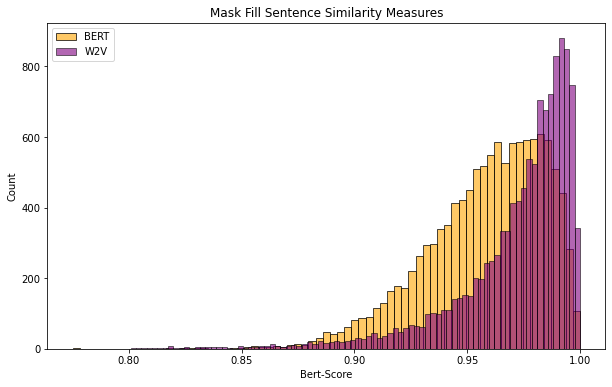

<Figure size 432x288 with 0 Axes>

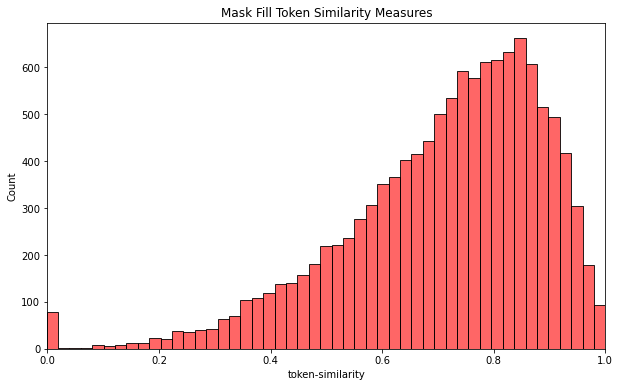

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Bert-Score'], label = 'BERT', alpha = 0.6, color = 'orange')
sns.histplot(df['Word2Vec-Score'], label = 'W2V', alpha=0.6, color = 'purple')
plt.legend()
plt.title('Mask Fill Sentence Similarity Measures')

plt.figure()
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df['token-similarity'], label = 'TokSim', alpha=0.6, color = 'red')
plt.title('Mask Fill Token Similarity Measures')
plt.xlim([0,1])

# Visualizing Label Flip and Class Probability

Define four conditions based on label flip and probability of label, given by RoBERTA softmax.

1. Certain Flip
2. Uncertain Flip
3. Certain Same
4. Uncertain Same



<AxesSubplot:xlabel='same-label-prob-diff', ylabel='Count'>

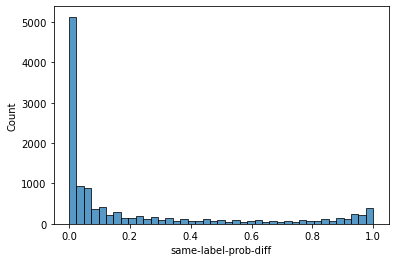

In [10]:
sns.histplot(df['same-label-prob-diff'])

In [11]:
# creating label flips
df['flip-class'] = 0
df.loc[(df['label-changed'] == True) & (df['orig-label-prob'] > 0.8) & (df['new-label-prob'] >= 0.8), 'flip-class'] = 1
df.loc[(df['label-changed'] == True) & (df['orig-label-prob'] > 0.8) & (df['new-label-prob'] < 0.8), 'flip-class'] = 2
df.loc[(df['label-changed'] == False) & (df['orig-label-prob'] > 0.8) & (df['new-label-prob'] >= 0.8), 'flip-class'] = 3
df.loc[(df['label-changed'] == False) & (df['orig-label-prob'] > 0.8) & (df['new-label-prob'] < 0.8), 'flip-class'] = 4

Text(0.5, 1.0, 'Counts of Label-Flip Categories')

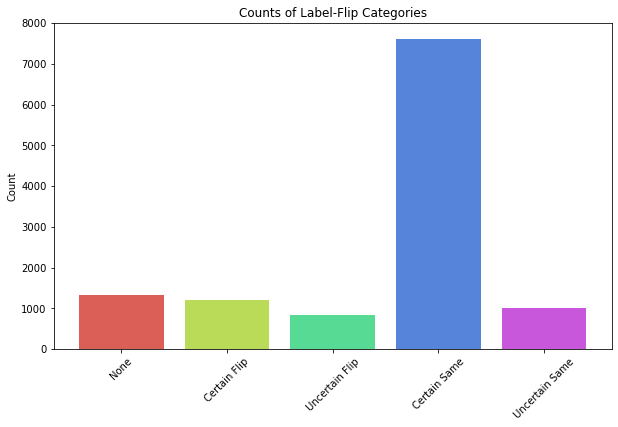

In [13]:
# counting
counts = df['flip-class'].groupby(df['flip-class']).size()
counts.index = ['None', 'Certain Flip', 'Uncertain Flip', 'Certain Same', 'Uncertain Same']

fig, ax = plt.subplots(figsize=(10,6))
plt.bar(range(len(counts)), counts, alpha = 1, align='center', color = list(sns.color_palette("hls", len(counts)).as_hex()))
plt.xticks(range(5), [name for name in counts.index], rotation = 45)
plt.ylabel('Count')
plt.title('Counts of Label-Flip Categories')